
# Governance Issue Tracking System
## Project Description
This project focuses on analyzing governance issues raised by citizens, specifically related to grievances in the aviation sector. We aim to track common issues, categorize them based on urgency and frequency, and forecast future trends in grievance handling.

### Objectives:
- Analyze grievance data to derive insights on received and disposed grievances over time.
- Identify anomalies in grievance data and their potential causes.
- Compare predictive models (ARIMA and Holt-Winters) for forecasting future grievances.
- Visualize findings for clarity and decision-making support.

## Data
The data used for this project was sourced from the Aviation Grievance dataset, which included the following columns:
- `category`: Type of grievance (e.g., Airline, Customs, etc.)
- `subcategory`: Specific sub-type of grievance.
- `totalReceived`: Total number of grievances received.
- `activeGrievancesWithoutEscalation`: Active grievances without escalation.
- `activeGrievancesWithEscalation`: Active grievances with escalation.
- `closedGrievancesWithoutEscalation`: Closed grievances without escalation.
- `closedGrievancesWithEscalation`: Closed grievances with escalation.

## Methodology
1. **Data Cleaning and Preprocessing**:
    - Loaded the data, checked for missing values, and performed necessary data cleaning.

2. **Exploratory Data Analysis**:
    - Visualized the grievances data over the years to understand trends and distributions.
    
3. **Anomaly Detection**:
    - Used the Isolation Forest algorithm to identify anomalies in grievance data.

4. **Time Series Forecasting**:
    - Implemented ARIMA and Holt-Winters models to predict future grievances.
    
5. **Model Comparison**:
    - Compared the predictive accuracy of ARIMA and Holt-Winters using Mean Absolute Error (MAE).

## Visualizations
- **Box Plots**: Displayed the distribution of grievances and highlighted anomalies.
- **Time Series Graphs**: Showed trends in received and disposed grievances over the years.
- **Forecasted Values**: Compared the predicted values from both models.

## Results
- **Anomaly Detection**: The year **2022-2023** was identified as an anomaly for both received and disposed grievances.
- **Forecasts**:
    - ARIMA forecasted approximately **12,012** grievances received and **11,498** disposed for the upcoming year.
    - Holt-Winters provided slightly higher forecasts but had a higher MAE.

## Conclusion
This project successfully analyzed the governance issues raised in the aviation sector. By employing anomaly detection and time-series forecasting, we derived actionable insights that can inform decision-makers. The ARIMA model proved to be more effective than Holt-Winters for this dataset. Continued monitoring and analysis of grievances can help improve governance and responsiveness to citizen concerns.

## Next Steps
- Deploying a dashboard for interactive visualization and exploration of grievances data.
- Conducting a deeper investigation into the factors causing anomalies in grievance submissions.
- Expanding the analysis to include more recent data and additional grievance categories.


In [3]:
import pandas as pd
# Loading the newly provided dataset to inspect its structure and content
data_path = 'RS_Session_259_AU_1704_1.csv'
data = pd.read_csv(data_path)

# Display the first few rows and basic info of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State/UT                               38 non-null     object 
 1   2017-18 - Received                     38 non-null     int64  
 2   2017-18 - Disposed                     38 non-null     int64  
 3   2018-19 - Received                     38 non-null     int64  
 4   2018-19 - Disposed                     38 non-null     int64  
 5   2019-20 - Received                     38 non-null     int64  
 6   2019-20 - Disposed                     38 non-null     int64  
 7   2020-21 - Received                     37 non-null     float64
 8   2020-21 - Disposed                     37 non-null     float64
 9   2021-22 - Received                     38 non-null     int64  
 10  2021-22 - Disposed                     38 non-null     int64  
 11  2022-23 

(                      State/UT  2017-18 - Received  2017-18 - Disposed  \
 0  Andaman and Nicobar Islands                   1                   1   
 1               Andhra Pradesh                   9                  10   
 2            Arunachal Pradesh                   6                   4   
 3                        Assam                  13                  11   
 4                        Bihar                 123                  82   
 
    2018-19 - Received  2018-19 - Disposed  2019-20 - Received  \
 0                   0                   0                   2   
 1                  11                  11                   8   
 2                   5                   7                   2   
 3                  29                  29                  21   
 4                 168                 214                 134   
 
    2019-20 - Disposed  2020-21 - Received  2020-21 - Disposed  \
 0                   0                 9.0                 9.0   
 1                

In [4]:
# Check for missing values and handle them appropriately
# Since '2020-21 - Received' and '2020-21 - Disposed' have some missing values, let's address them.

# Fill missing values in '2020-21 - Received' and '2020-21 - Disposed' with 0 (assuming missing values indicate no grievances)
data['2020-21 - Received'].fillna(0, inplace=True)
data['2020-21 - Disposed'].fillna(0, inplace=True)

# Convert data types for consistent analysis
data['2020-21 - Received'] = data['2020-21 - Received'].astype(int)
data['2020-21 - Disposed'] = data['2020-21 - Disposed'].astype(int)

# Verify that missing values have been addressed and data types are correct
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   State/UT                               38 non-null     object
 1   2017-18 - Received                     38 non-null     int64 
 2   2017-18 - Disposed                     38 non-null     int64 
 3   2018-19 - Received                     38 non-null     int64 
 4   2018-19 - Disposed                     38 non-null     int64 
 5   2019-20 - Received                     38 non-null     int64 
 6   2019-20 - Disposed                     38 non-null     int64 
 7   2020-21 - Received                     38 non-null     int64 
 8   2020-21 - Disposed                     38 non-null     int64 
 9   2021-22 - Received                     38 non-null     int64 
 10  2021-22 - Disposed                     38 non-null     int64 
 11  2022-23 (as on 10-03-

<ipython-input-4-96d36e435a48>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['2020-21 - Received'].fillna(0, inplace=True)
<ipython-input-4-96d36e435a48>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

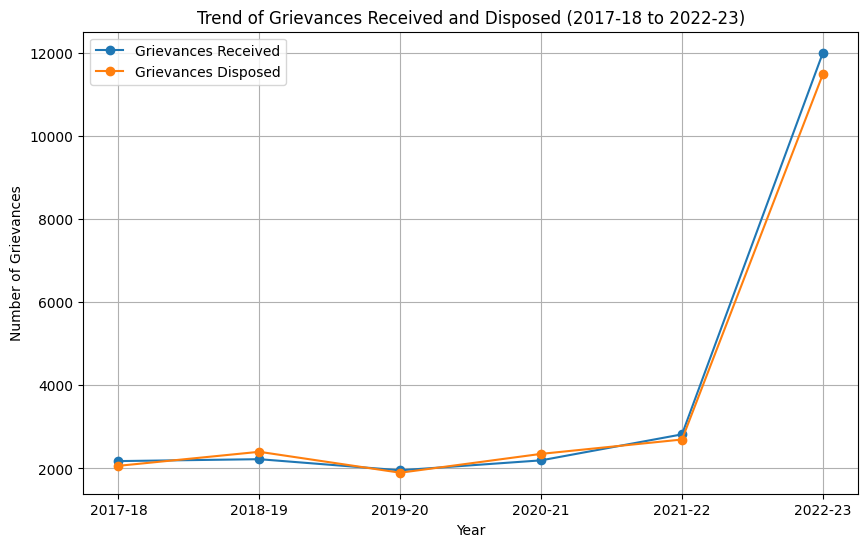

In [5]:
import matplotlib.pyplot as plt

# Prepare data for trend analysis by summing received and disposed grievances over the years
received_trend = data[['2017-18 - Received', '2018-19 - Received', '2019-20 - Received',
                       '2020-21 - Received', '2021-22 - Received', '2022-23 (as on 10-03-2023) - Received']].sum()
disposed_trend = data[['2017-18 - Disposed', '2018-19 - Disposed', '2019-20 - Disposed',
                       '2020-21 - Disposed', '2021-22 - Disposed', '2022-23 (as on 10-03-2023) - Disposed']].sum()

# Define years for x-axis
years = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

# Plot trends for received and disposed grievances
plt.figure(figsize=(10, 6))
plt.plot(years, received_trend, marker='o', label='Grievances Received')
plt.plot(years, disposed_trend, marker='o', label='Grievances Disposed')
plt.title('Trend of Grievances Received and Disposed (2017-18 to 2022-23)')
plt.xlabel('Year')
plt.ylabel('Number of Grievances')
plt.legend()
plt.grid(True)
plt.show()


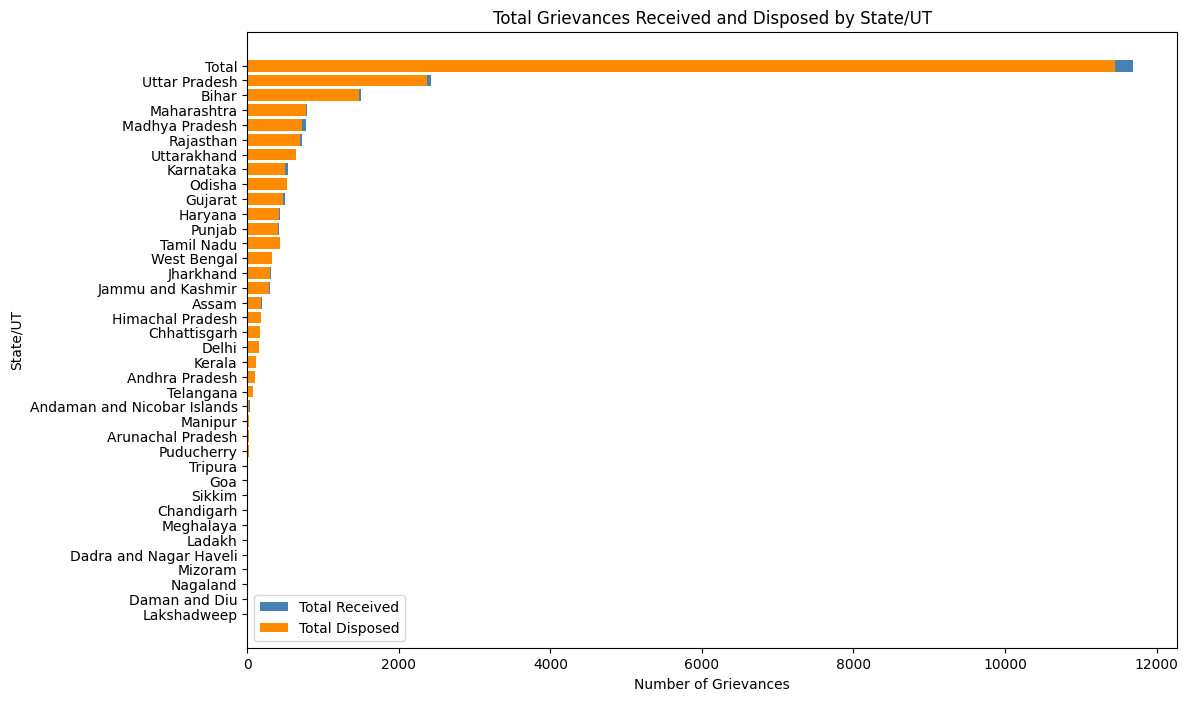

In [6]:
# Calculate total grievances received and disposed per state over all years
data['Total Received'] = data[['2017-18 - Received', '2018-19 - Received', '2019-20 - Received',
                               '2020-21 - Received', '2021-22 - Received', '2022-23 (as on 10-03-2023) - Received']].sum(axis=1)

data['Total Disposed'] = data[['2017-18 - Disposed', '2018-19 - Disposed', '2019-20 - Disposed',
                               '2020-21 - Disposed', '2021-22 - Disposed', '2022-23 (as on 10-03-2023) - Disposed']].sum(axis=1)

# Sort data by total grievances received to highlight states with the highest grievance counts
statewise_grievances = data[['State/UT', 'Total Received', 'Total Disposed']].sort_values(by='Total Received', ascending=False)

# Plot total grievances received and disposed by state
plt.figure(figsize=(12, 8))
plt.barh(statewise_grievances['State/UT'], statewise_grievances['Total Received'], color='steelblue', label='Total Received')
plt.barh(statewise_grievances['State/UT'], statewise_grievances['Total Disposed'], color='darkorange', label='Total Disposed')
plt.xlabel('Number of Grievances')
plt.ylabel('State/UT')
plt.title('Total Grievances Received and Disposed by State/UT')
plt.legend()
plt.gca().invert_yaxis()  # To display the highest values on top
plt.show()


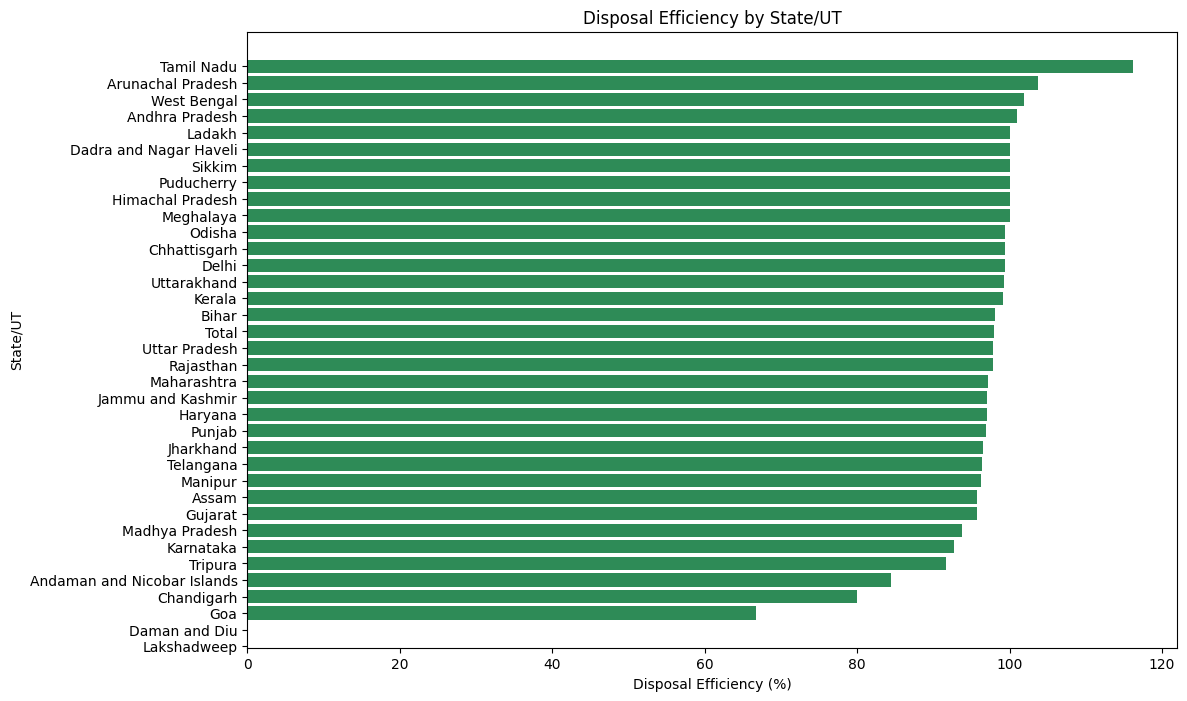

In [7]:
# Calculate disposal efficiency as the ratio of total disposed to total received grievances for each state
data['Disposal Efficiency (%)'] = (data['Total Disposed'] / data['Total Received']) * 100

# Sort by disposal efficiency for comparison
disposal_efficiency = data[['State/UT', 'Total Received', 'Total Disposed', 'Disposal Efficiency (%)']].sort_values(by='Disposal Efficiency (%)', ascending=False)

# Plot disposal efficiency by state
plt.figure(figsize=(12, 8))
plt.barh(disposal_efficiency['State/UT'], disposal_efficiency['Disposal Efficiency (%)'], color='seagreen')
plt.xlabel('Disposal Efficiency (%)')
plt.ylabel('State/UT')
plt.title('Disposal Efficiency by State/UT')
plt.gca().invert_yaxis()  # To display the highest efficiency states at the top
plt.show()


In [11]:
print(disposal_efficiency.columns)


Index(['State/UT', 'Total Received', 'Total Disposed',
       'Disposal Efficiency (%)'],
      dtype='object')


In [13]:
# Create the 'Efficiency Category' column based on the Disposal Efficiency percentage
disposal_efficiency['Efficiency Category'] = pd.cut(
    disposal_efficiency['Disposal Efficiency (%)'],
    bins=[-1, 10, 90, 100],
    labels=['Low Efficiency (<10th percentile)', 'Mid Efficiency', 'High Efficiency (>90th percentile)']
)


In [14]:
# Fill any NaN values in 'Efficiency Category' for states without a valid disposal efficiency value
disposal_efficiency['Efficiency Category'].fillna('Mid Efficiency', inplace=True)


<ipython-input-14-3bf669ee7433>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  disposal_efficiency['Efficiency Category'].fillna('Mid Efficiency', inplace=True)


In [17]:
# Define the thresholds for efficiency categorization
threshold_low = disposal_efficiency['Disposal Efficiency (%)'].quantile(0.1)  # 10th percentile
threshold_high = disposal_efficiency['Disposal Efficiency (%)'].quantile(0.9)  # 90th percentile

# Create the 'Efficiency Category' column
disposal_efficiency['Efficiency Category'] = 'Mid Efficiency'  # Default category
disposal_efficiency.loc[disposal_efficiency['Disposal Efficiency (%)'] < threshold_low, 'Efficiency Category'] = 'Low Efficiency (<10th percentile)'
disposal_efficiency.loc[disposal_efficiency['Disposal Efficiency (%)'] > threshold_high, 'Efficiency Category'] = 'High Efficiency (>90th percentile)'


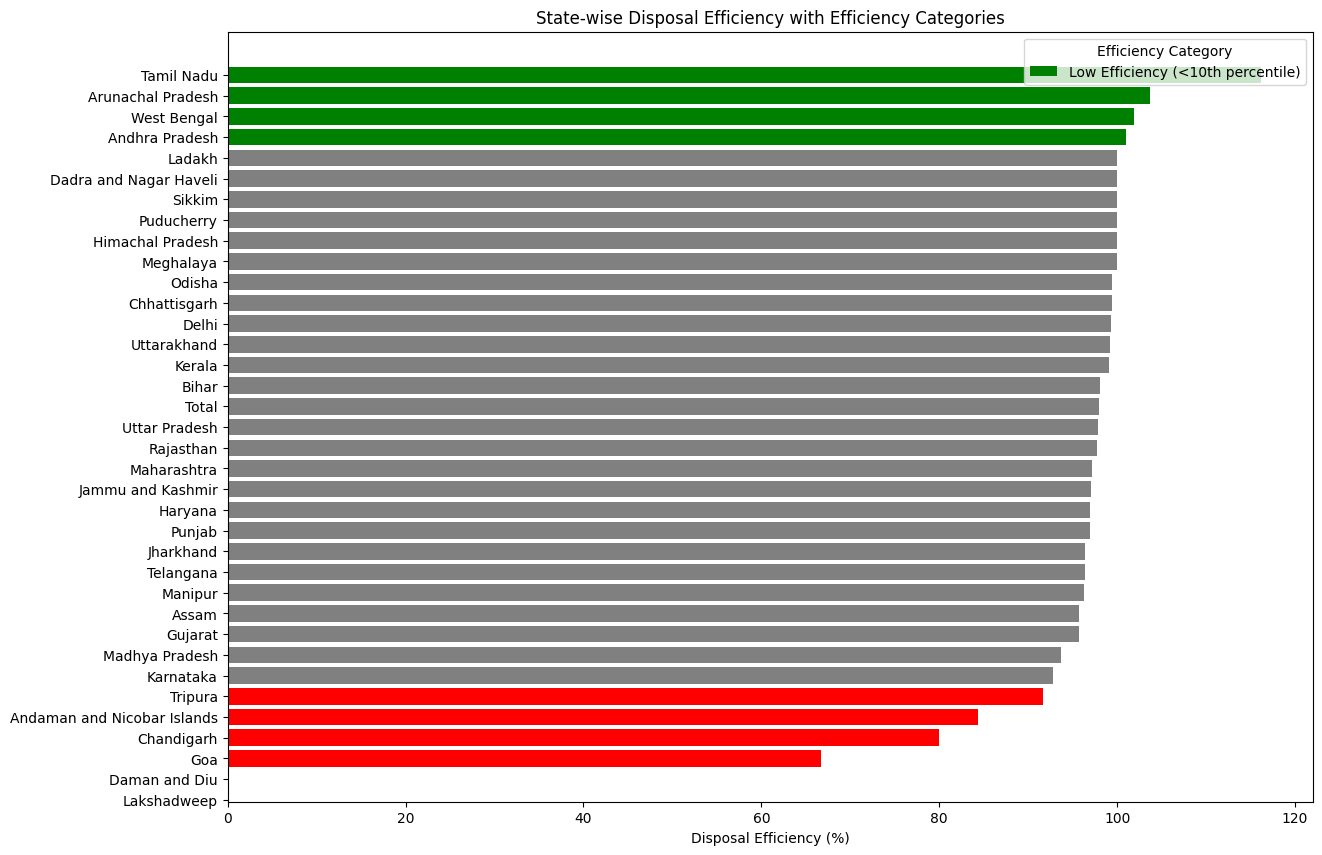

In [18]:
# Plotting state-wise disposal efficiency with colors indicating efficiency category
plt.figure(figsize=(14, 10))
colors = {
    'Low Efficiency (<10th percentile)': 'red',
    'Mid Efficiency': 'gray',
    'High Efficiency (>90th percentile)': 'green'
}

plt.barh(disposal_efficiency['State/UT'],
         disposal_efficiency['Disposal Efficiency (%)'],
         color=disposal_efficiency['Efficiency Category'].map(colors))

# Adding labels and titles
plt.xlabel('Disposal Efficiency (%)')
plt.title('State-wise Disposal Efficiency with Efficiency Categories')
plt.gca().invert_yaxis()  # Highest efficiency states on top
plt.legend(colors.keys(), title='Efficiency Category')
plt.show()


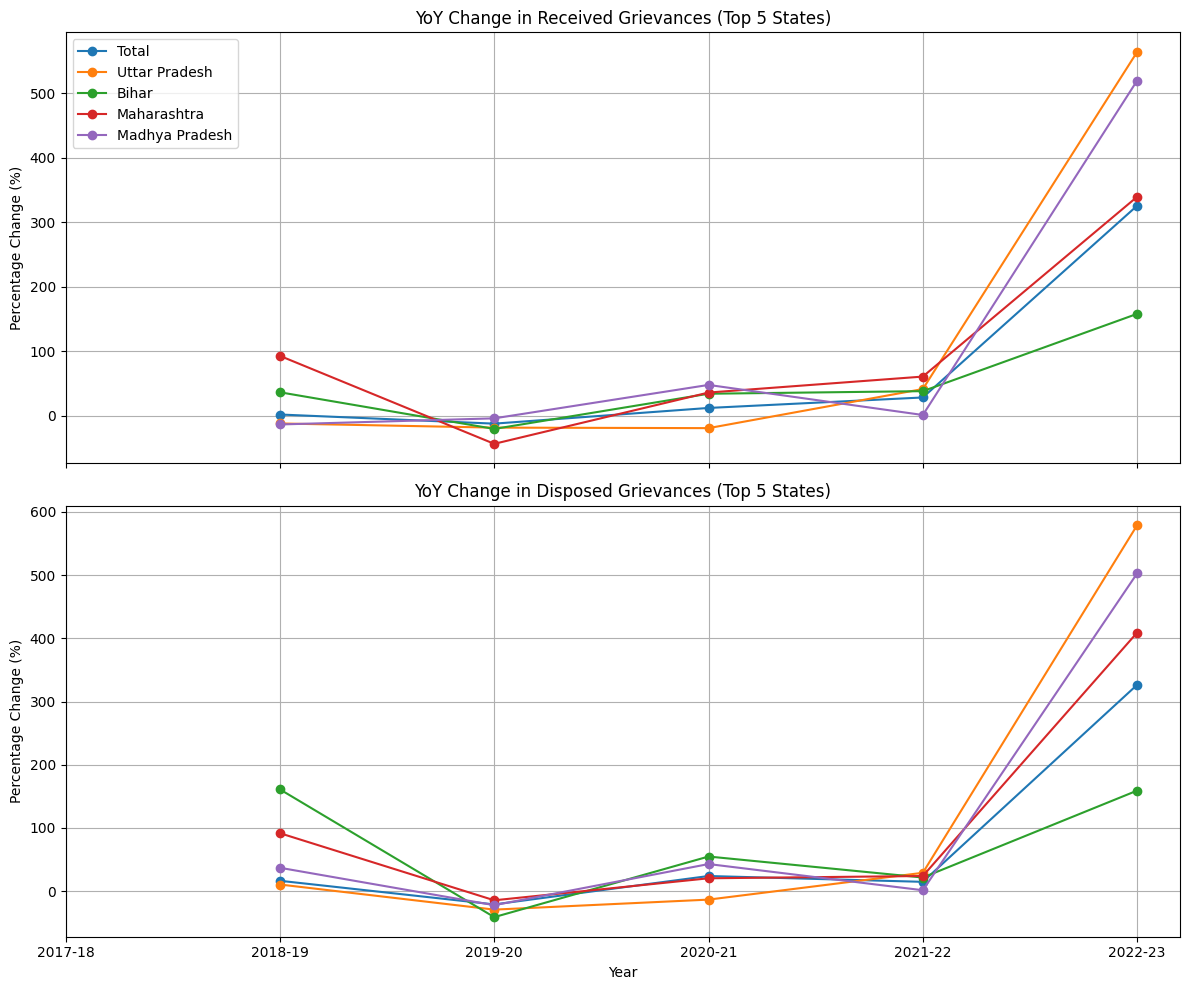

In [20]:
# To address the scattered x-labels, let's set consistent, aligned x-tick labels for each year
# Identify the top 5 states with the highest total grievances received across all years

top_states = data[['State/UT', 'Total Received']].sort_values(by='Total Received', ascending=False).head(5)['State/UT']



# Filter data to only include these top 5 states

top_states_data = data[data['State/UT'].isin(top_states)]



# Calculate Year-over-Year received and disposed grievances for each top state

yoy_received_top_states = top_states_data.groupby('State/UT')[['2017-18 - Received', '2018-19 - Received', '2019-20 - Received',

                                                               '2020-21 - Received', '2021-22 - Received',

                                                               '2022-23 (as on 10-03-2023) - Received']].sum().pct_change(axis=1) * 100



yoy_disposed_top_states = top_states_data.groupby('State/UT')[['2017-18 - Disposed', '2018-19 - Disposed', '2019-20 - Disposed',

                                                               '2020-21 - Disposed', '2021-22 - Disposed',

                                                               '2022-23 (as on 10-03-2023) - Disposed']].sum().pct_change(axis=1) * 100



# Plotting the YoY changes for each of the top 5 states with adjusted x-tick labels
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Define consistent x-tick labels for years
years = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

# YoY Change in Received Grievances
for state in top_states:
    axs[0].plot(years, yoy_received_top_states.loc[state].values, marker='o', label=state)

axs[0].set_title('YoY Change in Received Grievances (Top 5 States)')
axs[0].set_ylabel('Percentage Change (%)')
axs[0].legend()
axs[0].grid(True)

# YoY Change in Disposed Grievances
for state in top_states:
    axs[1].plot(years, yoy_disposed_top_states.loc[state].values, marker='o', label=state)

axs[1].set_title('YoY Change in Disposed Grievances (Top 5 States)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Percentage Change (%)')
axs[1].grid(True)

# Adjust x-ticks for consistent alignment
plt.xticks(years)
plt.tight_layout()
plt.show()


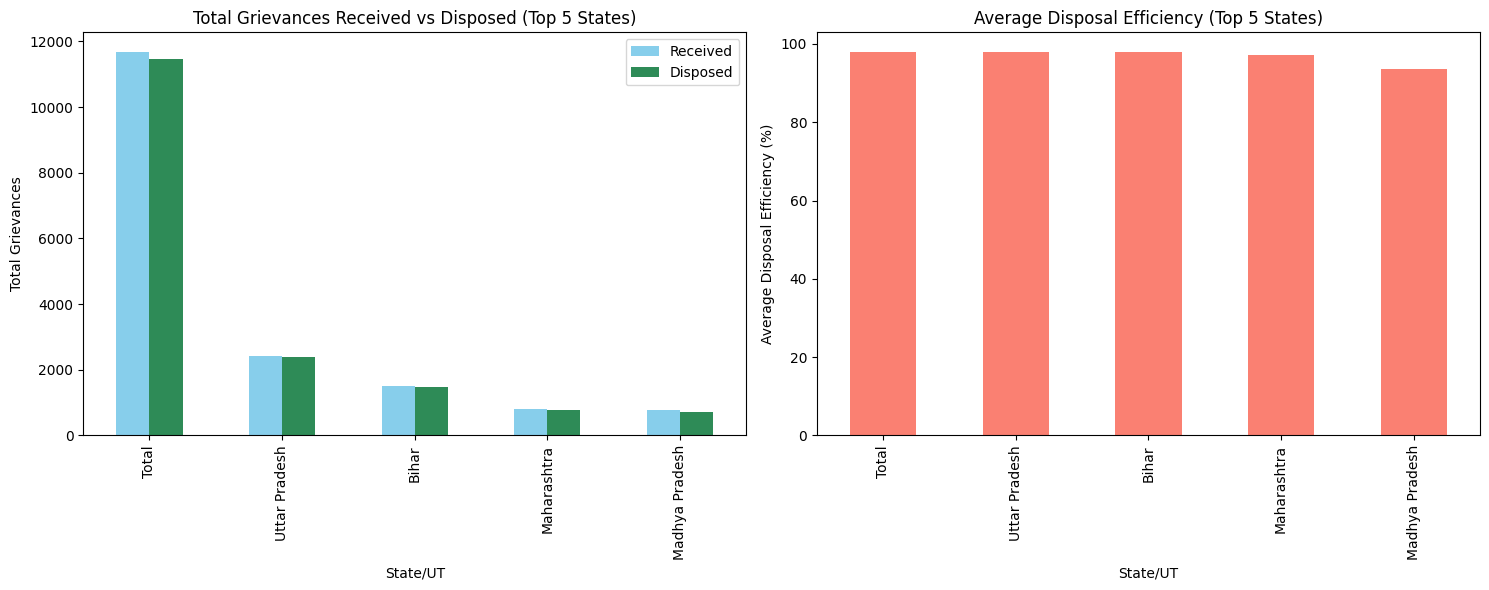

In [21]:
# Calculate total grievances received, disposed, and average disposal efficiency for the top 5 states
top_states_summary = top_states_data.groupby('State/UT').agg(
    Total_Received=('Total Received', 'sum'),
    Total_Disposed=('Total Disposed', 'sum'),
    Avg_Disposal_Efficiency=('Disposal Efficiency (%)', 'mean')
).sort_values(by='Total_Received', ascending=False)

# Plot total grievances received vs. disposed for each of the top 5 states
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Total Received vs Disposed bar plot
top_states_summary[['Total_Received', 'Total_Disposed']].plot(kind='bar', ax=ax[0], color=['skyblue', 'seagreen'])
ax[0].set_title('Total Grievances Received vs Disposed (Top 5 States)')
ax[0].set_ylabel('Total Grievances')
ax[0].legend(['Received', 'Disposed'])

# Average Disposal Efficiency bar plot
top_states_summary['Avg_Disposal_Efficiency'].plot(kind='bar', color='salmon', ax=ax[1])
ax[1].set_title('Average Disposal Efficiency (Top 5 States)')
ax[1].set_ylabel('Average Disposal Efficiency (%)')

plt.tight_layout()
plt.show()


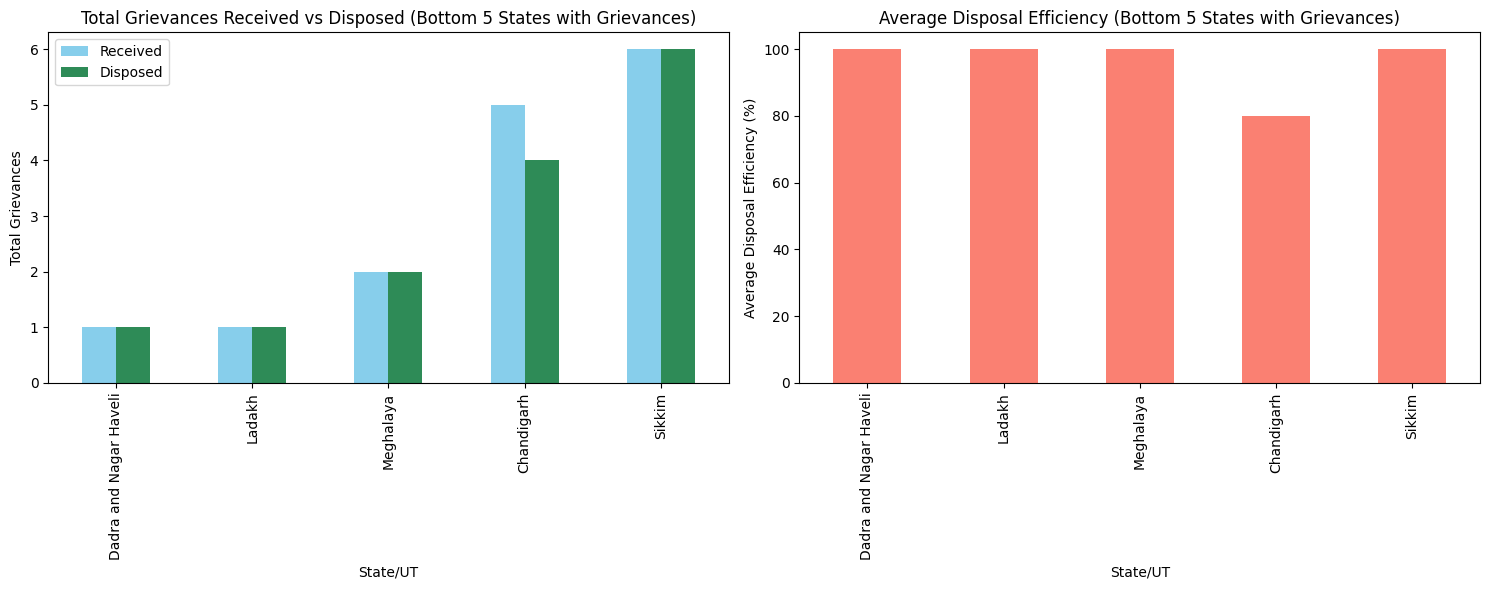

In [22]:
# Filter out states with at least one grievance received
states_with_grievances = data[data['Total Received'] > 0]

# Identify the bottom 5 states (with grievances) with the lowest total grievances received across all years
bottom_states_with_grievances = states_with_grievances[['State/UT', 'Total Received']].sort_values(by='Total Received', ascending=True).head(5)['State/UT']

# Filter data to only include these bottom 5 states
bottom_states_grievances_data = data[data['State/UT'].isin(bottom_states_with_grievances)]

# Calculate total grievances received, disposed, and average disposal efficiency for these bottom 5 states
bottom_states_grievances_summary = bottom_states_grievances_data.groupby('State/UT').agg(
    Total_Received=('Total Received', 'sum'),
    Total_Disposed=('Total Disposed', 'sum'),
    Avg_Disposal_Efficiency=('Disposal Efficiency (%)', 'mean')
).sort_values(by='Total_Received', ascending=True)

# Plot total grievances received vs. disposed for each of these bottom 5 states
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Total Received vs Disposed bar plot
bottom_states_grievances_summary[['Total_Received', 'Total_Disposed']].plot(kind='bar', ax=ax[0], color=['skyblue', 'seagreen'])
ax[0].set_title('Total Grievances Received vs Disposed (Bottom 5 States with Grievances)')
ax[0].set_ylabel('Total Grievances')
ax[0].legend(['Received', 'Disposed'])

# Average Disposal Efficiency bar plot
bottom_states_grievances_summary['Avg_Disposal_Efficiency'].plot(kind='bar', color='salmon', ax=ax[1])
ax[1].set_title('Average Disposal Efficiency (Bottom 5 States with Grievances)')
ax[1].set_ylabel('Average Disposal Efficiency (%)')

plt.tight_layout()
plt.show()


In [23]:
# Prepare the data for time-series forecasting by aggregating grievances received and disposed per year across all states

# Extract yearly grievances data for received and disposed
yearly_received = data[['2017-18 - Received', '2018-19 - Received', '2019-20 - Received',
                        '2020-21 - Received', '2021-22 - Received', '2022-23 (as on 10-03-2023) - Received']].sum()

yearly_disposed = data[['2017-18 - Disposed', '2018-19 - Disposed', '2019-20 - Disposed',
                        '2020-21 - Disposed', '2021-22 - Disposed', '2022-23 (as on 10-03-2023) - Disposed']].sum()

# Create a time-series DataFrame for both received and disposed grievances
time_series_data = pd.DataFrame({
    'Year': ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23'],
    'Received': yearly_received.values,
    'Disposed': yearly_disposed.values
})

# Display the prepared time-series data
time_series_data


,Year,Received,Disposed
0,2017-18,2176,2062
1,2018-19,2222,2400
2,2019-20,1954,1896
3,2020-21,2194,2350
4,2021-22,2820,2696
5,2022-23,12012,11498


In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Setting up the ARIMA model to forecast grievances for both 'Received' and 'Disposed' time series

# Function to fit ARIMA model, forecast next year, and calculate MAE
def arima_forecast(series, order=(1, 1, 1)):
    # Fit ARIMA model
    model = ARIMA(series, order=order)
    model_fit = model.fit()

    # Forecast next period (next year)
    forecast = model_fit.forecast(steps=1)

    # Calculate Mean Absolute Error (MAE) on fitted data
    predictions = model_fit.predict(start=1, end=len(series))
    mae = mean_absolute_error(series[1:], predictions[1:])  # Exclude first prediction due to differencing

    return forecast, mae

# Prepare series data for received and disposed grievances
received_series = time_series_data['Received']
disposed_series = time_series_data['Disposed']

# Forecast for next year and calculate MAE for 'Received'
received_forecast, received_mae = arima_forecast(received_series)

# Forecast for next year and calculate MAE for 'Disposed'
disposed_forecast, disposed_mae = arima_forecast(disposed_series)

received_forecast, received_mae, disposed_forecast, disposed_mae


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(6    12012.008449
 dtype: float64,
 0.0019123913697512763,
 6    11498.00792
 dtype: float64,
 0.001851559004671799)

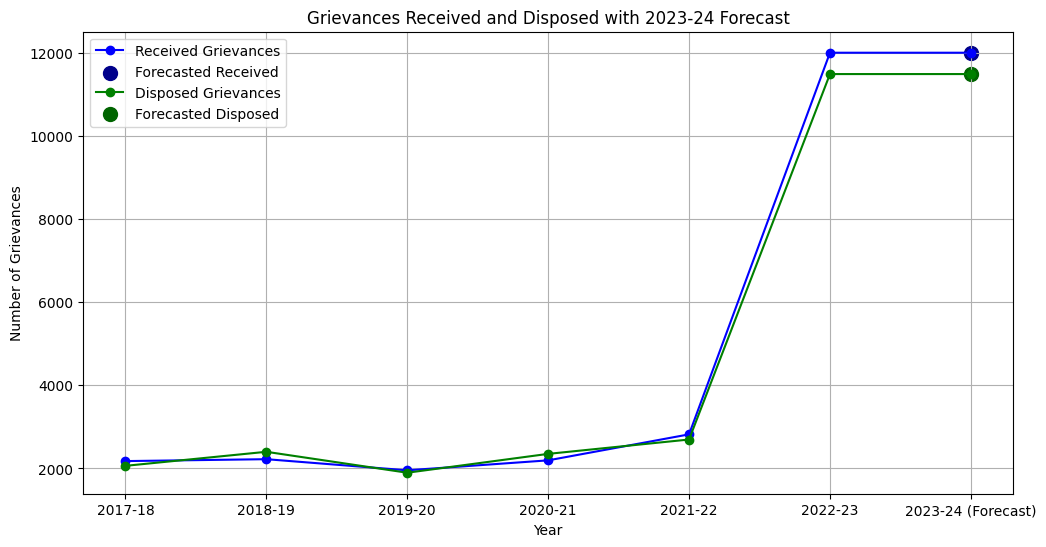

In [29]:
# Visualizing the ARIMA forecast for received and disposed grievances with highlighted forecasted values

# Append forecasted values to the original series for visualization
time_series_forecast = time_series_data.copy()
time_series_forecast = pd.concat([time_series_forecast, pd.DataFrame({
    'Year': ['2023-24 (Forecast)'],
    'Received': [received_forecast.values[0]],
    'Disposed': [disposed_forecast.values[0]]
})], ignore_index=True)

# Plot the series with forecast
plt.figure(figsize=(12, 6))

# Plot Received Grievances with forecast
plt.plot(time_series_forecast['Year'], time_series_forecast['Received'], marker='o', color='blue', label='Received Grievances')
plt.scatter('2023-24 (Forecast)', received_forecast.values[0], color='darkblue', s=100, label='Forecasted Received')

# Plot Disposed Grievances with forecast
plt.plot(time_series_forecast['Year'], time_series_forecast['Disposed'], marker='o', color='green', label='Disposed Grievances')
plt.scatter('2023-24 (Forecast)', disposed_forecast.values[0], color='darkgreen', s=100, label='Forecasted Disposed')

# Adding titles and labels
plt.title('Grievances Received and Disposed with 2023-24 Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Grievances')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [31]:
!pip install statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Revising the function to ensure forecasted values are correctly accessed
def holt_winters_trend_forecast(series, trend='add'):
    # Initialize and fit the model with trend only
    model = ExponentialSmoothing(series, trend=trend, seasonal=None)
    model_fit = model.fit()

    # Forecast the next period (next year)
    forecast = model_fit.forecast(steps=1).iloc[0]  # Access forecasted value directly

    # Calculate Mean Absolute Error (MAE) on historical data
    predictions = model_fit.fittedvalues
    mae = mean_absolute_error(series, predictions)

    return forecast, mae

# Re-running Holt-Winters trend-only model
received_forecast_hw_trend, received_mae_hw_trend = holt_winters_trend_forecast(received_series)
disposed_forecast_hw_trend, disposed_mae_hw_trend = holt_winters_trend_forecast(disposed_series)

received_forecast_hw_trend, received_mae_hw_trend, disposed_forecast_hw_trend, disposed_mae_hw_trend

(21077.648713018192, 1645.3313090182971, 7371.831832633714, 2379.7225402411755)

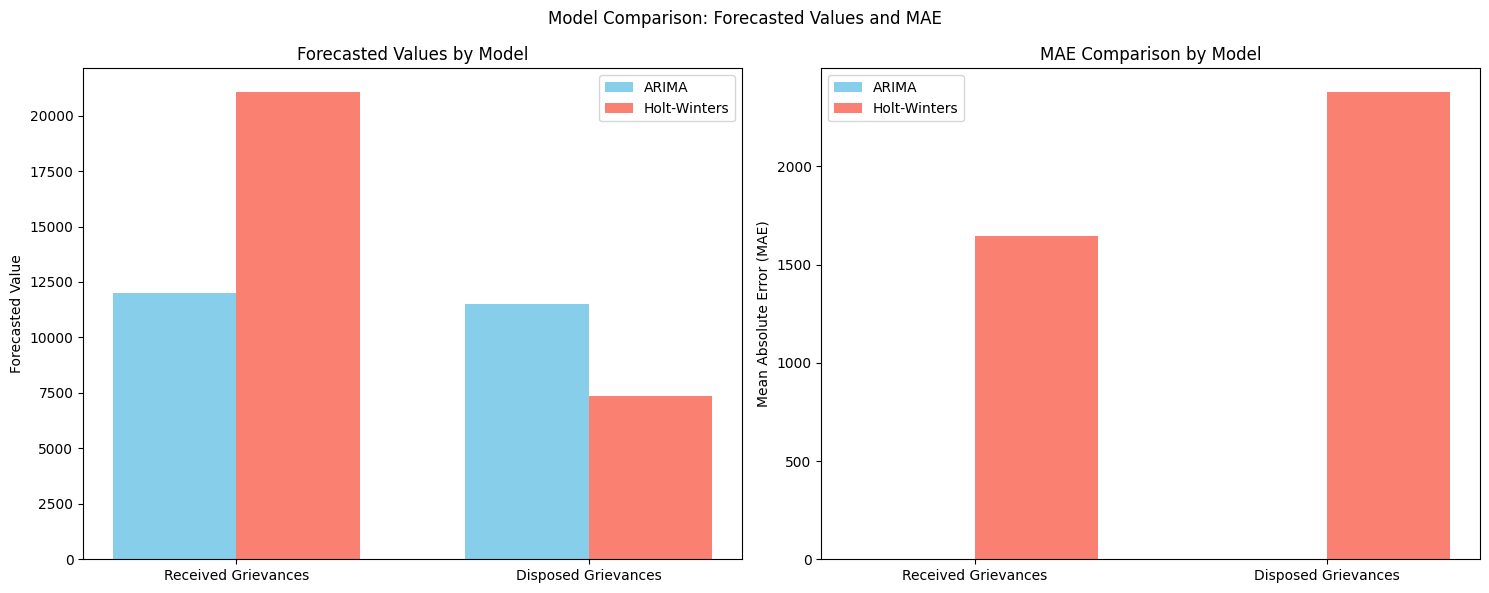

In [32]:
# Visualize the model comparison results for the forecasts and MAEs

import numpy as np

# Forecasted values and MAE for both models
forecasted_values = {
    'ARIMA': [received_forecast.values[0], disposed_forecast.values[0]],
    'Holt-Winters': [received_forecast_hw_trend, disposed_forecast_hw_trend]
}
mae_values = {
    'ARIMA': [received_mae, disposed_mae],
    'Holt-Winters': [received_mae_hw_trend, disposed_mae_hw_trend]
}

categories = ['Received Grievances', 'Disposed Grievances']

# Plotting the forecasts comparison
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Forecasted Values Comparison
x = np.arange(len(categories))
width = 0.35  # width of the bars

# Plot forecasts
axs[0].bar(x - width/2, forecasted_values['ARIMA'], width, label='ARIMA', color='skyblue')
axs[0].bar(x + width/2, forecasted_values['Holt-Winters'], width, label='Holt-Winters', color='salmon')
axs[0].set_xticks(x)
axs[0].set_xticklabels(categories)
axs[0].set_ylabel('Forecasted Value')
axs[0].set_title('Forecasted Values by Model')
axs[0].legend()

# MAE Comparison
axs[1].bar(x - width/2, mae_values['ARIMA'], width, label='ARIMA', color='skyblue')
axs[1].bar(x + width/2, mae_values['Holt-Winters'], width, label='Holt-Winters', color='salmon')
axs[1].set_xticks(x)
axs[1].set_xticklabels(categories)
axs[1].set_ylabel('Mean Absolute Error (MAE)')
axs[1].set_title('MAE Comparison by Model')
axs[1].legend()

plt.suptitle('Model Comparison: Forecasted Values and MAE')
plt.tight_layout()
plt.show()
